# Lecture 2 Math Review and TF.IDF
__Math 3280: Data Mining__

__Outline__
1. Importance of Words
2. TF.IDF
3. Regular Expressions
    * Searching
    * Metacharacters
    * Repetitions
    * Anchors

__Reading__ 
* Leskovec, Section 1.3.1

## Importance of Words

What makes a word in a document important? 
* Words appearing most frequently?
  * The most frequent words will always be common non-useful terms such as "the" or "and" (aka "stop words")
  * ---Draw 1D line for frequency---
    * Low: "Notwithstanding", "Albeit", "Conclusion"
    * High: "the", "and"
* Rare words
  * A lot of rare words are only used to help in sentence flow, such as "notwithstanding", "albeit", or "conclusion"
  * ---Draw 1D line for rarity---
    * Rare: "Notwithstanding", "Albeit"
    * Common: "the", "and", "conclusion"

*The difference between rare words that tell us something and those that do not has to do with the concentration (frequency) of the useful words in just a few documents.*
  * ---Draw 2D grid: x-axis rare to common, y-axis Low f to High f---
  * High f, common: "the", "and"
  * Low f, common: "conclusion"
  * Low f, rare: "notwithstanding", "albeit"
  * The important words are those that have high f and are rare (only occur with high frequency in just a few documents)

We'll calculate using the $TF.IDF$ (Term Frequency times Inverse Document Frequency)
* Term frequency ($TF_{ij}$): number of occurrences of word $i$ normalized in document $j$
$$TF_{ij} = \frac{f_{ij}}{max_k f_{kj}}$$

| __*Frequency*__ | Doc 0 | Doc 1 | Doc 2 |
| --------------: | :---: | :---: | :---: |
|          Word 0 |   7   |   8   |   4   |
|          Word 1 |   2   |   4   |   6   |
|          Word 2 |   5   |   9   |   0   |

$$max_k f_{k0} = 7 \qquad max_k f_{k1} = 9 \qquad max_k f_{k2} = 6$$

| __*TF*__ | Doc 0 | Doc 1 | Doc 2 |
| -------: | :---: | :---: | :---: |
|   Word 0 |   1   |  8/9  |  2/3  |
|   Word 1 |  2/7  |  4/9  |   1   |
|   Word 2 |  5/7  |   1   |   0   |

* Inverse Document Frequency ($IDF_i$): Inverse ratio of documents containing word $i$ on a logarithmic scale
  * If $n_i$ documents out of $N$ documents contain word $i$, then the ratio is $\frac{n_i}{N}$
  * The inverse ratio is $\frac{N}{n_i}$
  * Put onto a logarithmic scale

/tmp/ipykernel_18379/3702004862.py:10: RuntimeWarning: divide by zero encountered in divide
  ax.plot(x,np.log(N/x))


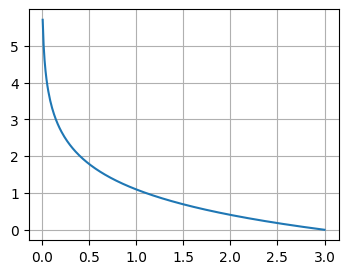

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
x = np.linspace(0, N, N*100 + 1)

#plt.rcParams['figure.figsize'] = 4, 3
fig,ax = plt.subplots(figsize=(4,3))

ax.plot(x,np.log(N/x))
ax.grid(True)
plt.show()

On an inverse logarithmic scale, words that appear in fewer documents ($n_i$) will give a large $IDF$, which should be the case for words that are unique to specific topics. But if the word appears in more documents, then the $IDF$ will approach 0.
$$IDF_i = \log_2\left(\frac{N}{n_i}\right)$$

| __*TF*__ | Doc 0 | Doc 1 | Doc 2 |
| -------: | :---: | :---: | :---: |
|   Word 0 |   1   |  8/9  |  2/3  |
|   Word 1 |  2/7  |  4/9  |   1   |
|   Word 2 |  5/7  |   1   |   0   |

$$IDF_0 = \log_2\left(\frac{3}{3}\right) = 0 \qquad IDF_1 = \log_2\left(\frac{3}{3}\right) = 0 \qquad IDF_2 = \log_2\left(\frac{3}{2}\right) = 0.58$$

| __*TF.IDF*__ | Doc 0              | Doc 1           | Doc 2        |
| -----------: | :----------------: | :-------------: | :----------: |
|       Word 0 | $$1*0=0$$          | $$8/9*0=0$$     | $$2/3*0=0$$  |
|       Word 1 | $$2/7*0=0$$        | $$4/9*0=0$$     | $$1*0=0$$    |
|       Word 2 | $$5/7*0.58=0.418$$ | $$1*0.58=0.58$$ | $$0*0.58=0$$ |

Word 2 is the most significant word in all documents, and is most significant in Doc 1.

# Regular Expressions

REGular EXpression (regex): A set of rules that helps to match patterns in a string.
* Contains a combination of normal characters (a-z, A_Z, 0-9, !@#$%^&*()) and special metacharacters

`r"st\d\s\w{3,10}"`

* `r` in the front indicates it is a regex
* `st` looks for the patter (st) anywhere in the string
* `\` indicates a metacharacter
  * `\d` any digit (0-9)
  * `\s` any whitespace
  * `\w` any character for a word (a-z, A-Z, 0-9)
  * `{3,10}` repetitions

Why?
* Very powerful and fast
* Find and replace text
  * Can be used for very complex patterns
* Validate strings

In [ ]:
import re

re.findall(r"#movies", "Love #movies! I had fun yesterday going to the #movies!")
re.split(r"!", "Nice place to eat! I'll come back! Excellent meat!")
re.sub(r"yellow", "nice", "I have a yellow car and a yellow house in a yellow neighborhood.")
re.search(r"yellow", "I have a yellow car and a yellow house in a yellow neighborhood.")

In [ ]:
# \d metacharacter
winners = "The winners are: User9, UserN, User8"

re.findall(r"User\d", winners) # A valid digit
re.findall(r"User\D", winners) # An invalid digit

# \w metacharacter
re.findall(r"User\w", winners) # A valid letter or digit

sale = "This shirt is on sale, only $5 today!"
re.findall(r"\W\d", sale) # An invalid letter or digit

# \s metacharacter
statement = "I really like ice-cream"
re.findall(r"really\slike", statement)
re.sub(r"ice\Scream", "ice cream", statement)

A __quantifier__ indicates how many times a pattern is repeated. Indicated by `{}`.

Other metacharacters to help with quantifiers:
* `{3}` indicates it appears 3 times
* `+` indicates it appears once or more times
* `*` indicates it appears zero or more times
* `?` indicates it appears zero times or only once
* `{3,7}` indicates it appears between 3 and 7 times
* `{3,}` indicates it appears 3 or more times

Note: r"apple+" indicates that (e) is repeated one or more times, not that (apple) is repeated.

In [ ]:
# Repetitions

password = "password1234"

re.search(r"\w\w\w\w\w\w\w\w\d\d\d\d", password)
re.search(r"\w{8}\d{4}", password)
re.search(r"\w+\d*", "password1234")
re.search(r"\w+\d*", "password")

statement = "The color of this image is amazing. However, the colour blue could be brighter."
re.findall(r"colou?r", statement)

phone_numbers = "John: 1-966-847-3131 Michelle: 54-908-42-42424"
re.findall(r"\d{1,2}-\d{3}-\d{2,3}-\d{4,}", phone_numbers)

In [ ]:
re.search(r"(apple){2,}", "appleappleapple")

re.search() vs. re.match()
* re.search() looks for patterns anywhere in the string
* re.match() looks for patterns at the beginning of the string
   * re.match() is anchored to the beginning of the string

More metacharacters:
* `^` anchors the search to the start of the string
* `$` anchors the search to the end of the string
* `.` is a wildcard
* `\` is also an escape

In [ ]:
attendance = "4506 people attended the show"
# print(re.search(r"\d{4}", attendance))
# print(re.match(r"\d{4}", attendance))

# print(re.search(r"attend", attendance))
# print(re.match(r"attend", attendance))

my_string = "the 80s music was much better than the 90s"
re.findall(r"the\s\d+s", my_string)
re.findall(r"^the\s\d+s", my_string)
re.findall(r"the\s\d+s$", my_string)
re.findall(r"the\s.0s", my_string)

sale
re.findall(r"\$5", sale)

In [ ]:
# OR operator
my_string = "Elephants are the world's largest land animal! I would love to see an elephant one day."
re.findall(r"Elephant|elephant", my_string)

re.findall(r"[Ee]lephant", my_string)

lotr = "The oliphant in Lord of the Rings is similar to the elephant in real life"
re.findall(r"[eo]l[ei]phant", lotr)

my_string = "Yesterday I spent my afternoon with my friends: MaryJohn2 Clary3 JohnPhilip"
re.findall(r"[a-zA-Z]+\d+", my_string)

In [ ]:
phrase = "Students passing this class: Anthony, Ethan, Samantha"
re.search(r":.*Michael.*",phrase)